# Bankruptcy Prediction

The following codes implements a bankruptcy prediction model for a given financial client. 

It further compares the results after Dimensionality Reduction.

## Libraries and Modules used

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings(action='ignore')

## Importing Dataset and Exploration

In [2]:
data=pd.read_csv('Data/Original_Data.csv')
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
ar=data.describe().transpose()
ar.to_clipboard()
ar

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


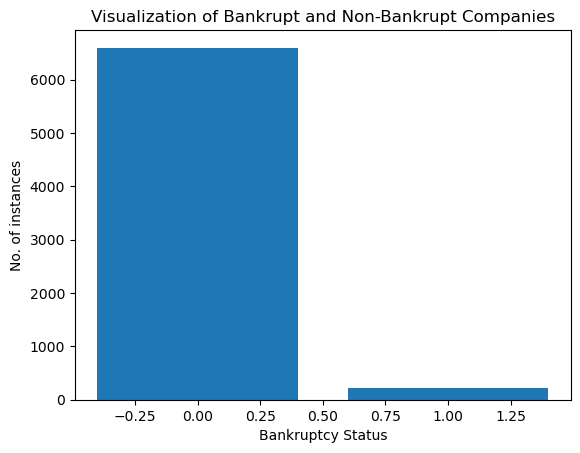

In [8]:
x_value=[0,1]
y_value=[(data['Bankrupt?']==i).sum() for i in x_value]
plt.bar(x_value,y_value)
plt.xlabel("Bankruptcy Status")
plt.ylabel("No. of instances")
plt.title("Visualization of Bankrupt and Non-Bankrupt Companies")
plt.show()

In [6]:
{column : len(data[column].unique()) for column in data.columns}

{'Bankrupt?': 2,
 ' ROA(C) before interest and depreciation before interest': 3333,
 ' ROA(A) before interest and % after tax': 3151,
 ' ROA(B) before interest and depreciation after tax': 3160,
 ' Operating Gross Margin': 3781,
 ' Realized Sales Gross Margin': 3788,
 ' Operating Profit Rate': 3376,
 ' Pre-tax net Interest Rate': 3789,
 ' After-tax net Interest Rate': 3604,
 ' Non-industry income and expenditure/revenue': 2551,
 ' Continuous interest rate (after tax)': 3617,
 ' Operating Expense Rate': 2966,
 ' Research and development expense rate': 1536,
 ' Cash flow rate': 5557,
 ' Interest-bearing debt interest rate': 1080,
 ' Tax rate (A)': 2488,
 ' Net Value Per Share (B)': 2278,
 ' Net Value Per Share (A)': 2285,
 ' Net Value Per Share (C)': 2284,
 ' Persistent EPS in the Last Four Seasons': 1358,
 ' Cash Flow Per Share': 1545,
 ' Revenue Per Share (Yuan ¥)': 3807,
 ' Operating Profit Per Share (Yuan ¥)': 1236,
 ' Per Share Net profit before tax (Yuan ¥)': 1522,
 ' Realized Sale

From the above exploration, we can see that the 'Net Income Flag' has only 1 Unique value which implies it's lack of relevance in the dataset.

## Preprocessing

In [7]:
def preprocess_inputs(df):
    df=df.copy()
    df=df.drop(' Net Income Flag', axis=1)
    return df

In [8]:
X=preprocess_inputs(data)
X

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.1900

In [9]:
def split_data(df):
    y=df['Bankrupt?']
    x=df.drop('Bankrupt?', axis=1)

    x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.7,shuffle=True,random_state=1)

    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train), index=x_train.index, columns=x_train.columns)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test=split_data(X)
x_train


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
3392,-7.065972,-7.189713,-7.577832,-0.353178,-0.352216,-27.422519,-9.852867,-9.473508,0.174600,-17.488805,-0.623336,-0.750627,-3.409234,-0.146024,-0.831378,-1.684936,-1.679626,-1.680602,-2.210939,-1.269358,-0.023643,-2.383154,-1.803000,-0.072283,-0.149416,-0.092698,-0.093621,-0.017514,-1.071132,-0.123720,-0.358472,-6.762465,-0.014476,-0.029836,-0.031652,-0.025154,-0.245936,0.245936,-0.118704,-0.292121,-0.045435,-2.398334,-1.930971,-0.554824,-1.366000,-0.04243,-0.038594,0.886224,0.736406,-0.842540,-0.020349,-0.918259,-0.039086,0.776376,1.652612,0.989620,-0.369080,-0.014476,-0.074892,0.334264,-4.717374,-0.033918,-0.090308,1.161424,0.227750,-0.066147,-0.092181,-6.779749,-0.045371,8.415101,-0.423261,-0.643034,0.806322,-0.842942,-1.475297,-0.161486,1.161424,-0.066147,-0.219187,-5.838952,-2.424303,-8.876742,-3.764293,-0.301941,-0.032383,-9.998552,4.692638,-0.014135,-0.353225,-1.832779,-0.140534,-0.046856,-0.002980,-0.193823
2755,0.405365,0.354931,0.313557,0.203699,0.200630,0.105921,0.077435,0.062927,0.047214,0.099756,-0.623336,1.316196,0.168498,-0.146024,0.987475,-0.101405,-0.100452,-0.101962,0.111816,0.190816,-0.023643,-0.097101,0.136276,-0.080535,-0.032348,0.008982,0.007273,-0.008501,0.377593,-0.034893,-0.058556,0.354458,-0.014476,-0.029836,-0.006998,-0.025154,-0.432271,0.432271,-0.119722,-0.156458,-0.017916,-0.092838,0.172557,-0.268783,-0.3

In [10]:
y_train

3392    0
2755    0
4442    0
4267    0
4912    0
       ..
905     0
5192    0
3980    0
235     1
5157    0
Name: Bankrupt?, Length: 4773, dtype: int64

## Training (Without Dimensionality Reduction)


In [11]:
original_models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in original_models.items():
    model.fit(x_train,y_train)
    print(name+' trained.')

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [12]:
print('Score of Models')
original_results=[]

for name, model in original_models.items():
    result=model.score(x_test,y_test)
    original_results.append(result)
    print(name +": {:.2f}%".format(result * 100))

Score of Models
                   Logistic Regression: 65.49%
                   K-Nearest Neighbors: 96.53%
                         Decision Tree: 96.53%
Support Vector Machine (Linear Kernel): 68.77%
   Support Vector Machine (RBF Kernel): 96.53%
                        Neural Network: 96.53%
                         Random Forest: 96.53%
                     Gradient Boosting: 96.53%


In [13]:
print('Original Bankruptcy Percentage(Not Multiplied by 100)')
y_test.value_counts()/len(y_test)

Original Bankruptcy Percentage(Not Multiplied by 100)


0    0.965298
1    0.034702
Name: Bankrupt?, dtype: float64

## Dimensionality Reduction (PCA)

In [14]:
n_components=94
pca=PCA(n_components)
pca.fit(x_train)
x_train_reduced=pd.DataFrame(pca.transform(x_train), index=x_train.index, columns=['PC'+str(i) for i in range(1, n_components+1)])
x_test_reduced=pd.DataFrame(pca.transform(x_test), index=x_test.index, columns=['PC'+str(i) for i in range(1, n_components+1)])

In [15]:
x_train_reduced

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94
3392,21.396971,-7.427836,-10.384790,16.385044,8.410605,14.815803,-1.072838,0.033075,2.402385,-2.696531,-4.214135,6.352764,-11.027381,1.913793,1.606729,1.729124,0.570398,-0.789446,-0.892282,-0.320629,-1.797002,-2.299265,0.158909,-2.584296,-2.901013,1.291582,0.719369,0.071927,-1.077647,1.268982,0.234510,-1.286139,-2.170726,0.026729,0.659986,1.623508,-0.299143,-1.253455,0.089233,1.378367,-3.465337,-0.325044,-5.566624,-0.114496,-2.370308,-1.374702,0.387789,0.008084,-0.623874,2.009423,1.666888,-6.253381,-5.552162,-5.670375,13.485811,5.164796,2.414657,0.248695,5.763678,1.951909,-0.096881,-1.057261,2.146485,-1.081045,7.166036,1.682672,0.923173,1.780433,-1.115230,-0.843055,-0.433020,1.470648,-0.138616,-0.440672,-1.108144,0.010372,0.930639,-0.632512,-0.124990,-0.251547,-1.437326,0.054612,0.302335,-0.058173,-0.031229,0.057488,0.262348,0.005251,1.425501e-05,8.958819e-06,-7.364243e-10,1.769235e-15,6.092294e-15,1.289865e-16
2755,-0.537250,-0.632416,1.522062,0.059505,-0.892918,0.115449,0.166554,-0.332114,-0.642663,-0.422476,0.569907,-0.704901,0.165873,-0.239947,0.391633,0.419027,-0.332370,-0.234684,0.223903,0.538678,-1.338388,0.872265,1.142810,0.173128,-0.165659,0.182387,-0.318347,-0.268019,-0.151064,0.371043,-0.610176,0.540534,-0.316358,0.052687,-0.047715,0.225196,-1.077294,0.739121,-0.639626,-0.100860,0.721593,-1.240560,-0.501506,0.063968,0.379138,-0.043415,-0.135799,-0.568019,0.136798,-0.411147,0.113967,-0.007154,0.158042,0.227862,0.527669,-0.189042,0.114654,0.013197,-0.045299,-0.071416,-0.107512,0.158320,-0.154621,-0.242867,0.027840,-0.131080,0.127882,0.022143,0.056348,0.011610,-0.015061,0.001409,-0.010412,0.032839,-0.003984,-0.028037,-0.017289,0.021823,0.001008,0.013471,0.007356,-0.012186,-0.001268,0.001103,0.000554,-0.000496,0.001396,0.000096,-7.010621e-06,-3.457161e-05,-8.154469e-11,-2.633085e-16,-3.538098e-16,-2.237539e-16
4442,-3.777733,-0.482875,1.127331,0.334114,1.277027,0.359205,0.872919,-0.504780,-1.627089,-1.011487,1.137812,-0.990688,0.020866,0.753910,0.551596,-0.209501,0.195654,0.323243,-0.338553,0.361258,-0.945430,0.968478,0.652160,0.036588,0.389052,0.179218,0.169331,-0.071738,0.091093,-0.075175,-0.328946,0.002957,0.206092,0.648976,-0.053190,-0.402783,0.213547,0.060351,0.461387,-0.270898,-0.165188,1.563078,0.335242,0.200471,-0.000799,-0.080850,0.157284,-0.297051,0.606349,-0.728476,0.456325,-0.393636,0.184266,-0.454713,0.214520,0.235545,-0.154430,-0.207144,-0.302312,-0.311534,0.309213,-0.333500,0.573638,0.242300,-0.057151,0.164958,-0.088129,-0.135636,-0.132184,0.064894,-0.124100,-0.120966,0.026133,0.046278,-0.017616,0.018570,-0.006252,-0.033432,0.012967,0.026627,-0.027596,-0.016177,0.008452,0.005571,-0.011204,0.007751,0.003282,0.000274,-1.623794e-04,3.562151e-05,2.126627e-11,-5.359923e-16,1.306653e-15,2.844766e-16
4267,3.117700,-0.669615,1.191915,-0.644932,-1.861750,0.650279,0.850108,-0.755383,-0.427210,-0.891521,2.446697,0.372685,-0.289336,-0.837916,-0.458419,-1.117063,1.562364,-0.621951,0.089918,-0.036900,-1.141743,1.467604,0.620103,-0.020184,-0.798211,1.344014,-1.028388,-0.545923,0.273551,0.780606,-1.704963,-0.071611,-0.486957,0.147964,-0.206660,1.481683,-0.057097,0.395285,-0.809322,-0.551451,0.363974,-1.241436,-1.223641,0.086683,0.756062,0.506555,-0.233691,1.014928,-0.963541,1.120362,-1.358330,0.992346,-0.710175,0.578414,0.873999,-1.239706,0.049998,0.099915,-0.651922,1.418889,-0.041258,-0.519515,-0.045136,-0.426192,-0.061291,0.235479,-0.078614,0.132220,-0.025381,0.027091,0.025570,-0.062664,-0.209238,-0.071025,0.006483,0.108301,0.089400,0.040665,-0.010364,0.046168,0.021

In [16]:
x_train_reduced.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94
count,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03
mean,-2.000402e-17,4.817247e-17,1.000201e-17,-2.039945e-17,6.247767e-17,-3.526290e-17,5.277804e-17,4.191540e-17,5.747666e-17,2.760366e-17,-8.094649e-18,3.075036e-17,-2.184741e-17,2.372570e-18,1.851535e-17,2.585403e-17,3.719352e-17,-2.987519e-18,1.163315e-17,2.734270e-17,1.539844e-17,1.925968e-17,2.872670e-17,2.017847e-18,-4.063607e-17,2.405134e-17,2.173402e-18,1.492160e-17,-1.786405e-17,-1.756167e-17,2.200442e-17,2.652858e-17,-1.265661e-17,7.722482e-18,-5.512735e-18,-3.272169e-17,-2.102748e-17,3.430922e-18,-2.990717e-17,-3.195991e-17,1.816644e-17,-2.730781e-17,2.005054e-17,1.619511e-17,-7.862044e-18,1.323522e-17,-2.437699e-17,-8.048128e-18,-6.047727e-18,2.148751e-17,-4.190885e-18,3.349510e-18,-2.680771e-18,1.115340e-17,4.439264e-17,2.783263e-18,1.632886e-17,-1.874795e-17,7.053743e-18,2.667414e-18,-1.272349e-17,3.794367e-18,-2.955826e-17,6.387911e-18,-1.359575e-17,2.723221e-17,-2.442933e-17,4.803290e-18,-1.666032e-17,1.575607e-17,-9.485917e-19,-6.512936e-18,9.182077e-18,-2.241729e-18,-1.512513e-17,4.557602e-18,-1.808139e-19,2.269351e-17,-4.736053e-18,-6.082617e-18,3.762384e-18,-6.960701e-18,-2.319507e-18,8.299996e-18,3.343695e-20,7.058740e-18,9.472106e-18,6.791789e-18,1.192425e-19,-6.368932e-19,2.451673e-17,2.243926e-17,-4.699740e-19,6.626578e-18
std,3.608307e+00,2.666728e+00,2.301153e+00,2.240383e+00,2.170172e+00,1.802285e+00,1.736072e+00,1.499769e+00,1.485012e+00,1.445549e+00,1.394536e+00,1.338177e+00,1.329033e+00,1.276697e+00,1.223592e+00,1.164099e+00,1.158493e+00,1.121536e+00,1.114318e+00,1.103978e+00,1.094967e+00,1.070406e+00,1.042191e+00,1.022780e+00,1.016503e+00,1.012519e+00,1.006838e+00,1.002407e+00,1.000604e+00,9.944115e-01,9.885120e-01,9.864065e-01,9.785258e-01,9.775492e-01,9.746456e-01,9.546814e-01,9.440345e-01,9.316446e-01,9.212385e-01,9.066758e-01,8.961778e-01,8.835767e-01,8.560177e-01,8.291014e-01,8.157149e-01,7.813326e-01,7.752720e-01,7.584829e-01,7.198249e-01,7.079448e-01,6.666836e-01,6.555776e-01,6.423832e-01,6.111805e-01,5.982282e-01,5.655035e-01,5.335609e-01,5.149912e-01,4.839961e-01,4.680639e-01,4.465116e-01,4.165755e-01,4.096256e-01,4.001292e-01,3.666637e-01,3.642006e-01,3.013836e-01,2.613791e-01,2.450246e-01,2.305475e-01,2.250341e-01,2.043648e-01,1.807070e-01,1.737111e-01,1.473727e-01,1.407645e-01,1.189050e-01,1.111018e-01,1.005816e-01,8.791131e-02,

In [17]:
fig=px.bar(
    x=['PC'+str(i) for i in range(1, n_components+1)],
    y=pca.explained_variance_ratio_,
    labels={'x': 'Principal COmponent', 'y': 'Variance Ratio'},
    color=pca.explained_variance_ratio_,
    color_continuous_scale=[(0,'lightblue'),(1,'darkblue')],
    title='Proportion of Variance in Principal Components'
)
fig.show()

Dimensionality Reduction is basically a form of unsupervised learning using PCA. 

We consider each feature as an axis which are perpendicular to each other in a 94 dimensional space(here) on the basis of variance.

In the data, there might be some axis which is a combination of other axes and captures most variance in the space.

PCA is used to calculate this axis. We are basically looking for the axis that lines up with the greatest variance in the data and other axes that don't line up will be carrying less information and can be dropped.

Thus, from the latest graph, we can see that the first 50 axes are carrying the majority of information. 

In [18]:
n_components=50
pca=PCA(n_components)
pca.fit(x_train)
x_train_reduced=pd.DataFrame(pca.transform(x_train), index=x_train.index, columns=['PC'+str(i) for i in range(1, n_components+1)])
x_test_reduced=pd.DataFrame(pca.transform(x_test), index=x_test.index, columns=['PC'+str(i) for i in range(1, n_components+1)])
fig=px.bar(
    x=['PC'+str(i) for i in range(1, n_components+1)],
    y=pca.explained_variance_ratio_,
    labels={'x': 'Principal COmponent', 'y': 'Variance Ratio'},
    color=pca.explained_variance_ratio_,
    color_continuous_scale=[(0,'lightblue'),(1,'darkblue')],
    title='Proportion of Variance in Principal Components'
)
fig.show()

## Training (Reduced Data)

In [19]:
reduced_models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}
for name, model in reduced_models.items():
    model.fit(x_train_reduced,y_train)
    print(name+' trained.')

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [20]:
reduced_results=[]
for name, model in reduced_models.items():
    result=model.score(x_test_reduced, y_test)
    reduced_results.append(result)
    print(name +": {:.2f}%".format(result * 100))

                   Logistic Regression: 60.12%
                   K-Nearest Neighbors: 96.53%
                         Decision Tree: 33.28%
Support Vector Machine (Linear Kernel): 64.42%
   Support Vector Machine (RBF Kernel): 96.53%
                        Neural Network: 96.53%
                         Random Forest: 9.97%
                     Gradient Boosting: 39.49%


## Change in Performance

In [21]:
fig=px.bar(
    x=np.subtract(original_results,reduced_results),
    y=original_models.keys(),
    orientation='h',
    labels={'x':'Change in Performance','y':'Model'},
    color=np.subtract(original_results,reduced_results),
    color_continuous_scale=[(0,'red'),(1,'blue')],
    title='Change in Model Performance After Dimentionality Reduction'
)
fig.show()   